In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
import zipfile

# Define column names
col_names = ['label', 'text']

# Load the datasets
train_df = pd.read_csv("/data/nmamit-interns/grp3/new/train.csv", names=col_names)
test_df = pd.read_csv("/data/nmamit-interns/grp3/new/test.csv", names=col_names)

# Check the shape of the datasets
print("Original train_df shape:", train_df.shape) 
print("Original test_df shape:", test_df.shape)    # Should be (38000, 2)

# Get the column names
print("Train column names:", train_df.columns.tolist())
print("Test column names:", test_df.columns.tolist())

# Define the sample size
sample_size = 50000

# Perform stratified sampling
train_df, _ = train_test_split(
    train_df,
    train_size=sample_size,
    stratify=train_df['label'],
    random_state=42
)

# Verify the new distribution
original_class_distribution = train_df['label'].value_counts(normalize=True)
reduced_class_distribution = train_df['label'].value_counts(normalize=True)

print("Original class distribution:\n", original_class_distribution)
print("Reduced class distribution:\n", reduced_class_distribution)

# Verify the shape of the reduced dataset
print("Reduced train_df shape:", train_df.shape)  # Should be (50000, 2)

# Optionally save the reduced dataset to a new CSV file
train_df.to_csv("reduced_train.csv", index=False)


Original train_df shape: (560000, 2)
Original test_df shape: (38000, 2)
Train column names: ['label', 'text']
Test column names: ['label', 'text']
Original class distribution:
 label
2    0.5
1    0.5
Name: proportion, dtype: float64
Reduced class distribution:
 label
2    0.5
1    0.5
Name: proportion, dtype: float64
Reduced train_df shape: (50000, 2)


In [2]:
train_df.shape

(50000, 2)

In [3]:
test_df.shape

(38000, 2)

In [4]:
train_df.head(3)

,label,text
258632,2,Thought I'd try a new coffee shop so I found t...
433014,2,"Reasonable prices, good variety of flavors, an..."
558319,2,Tiny little cafe perfectly placed in Latta Arc...


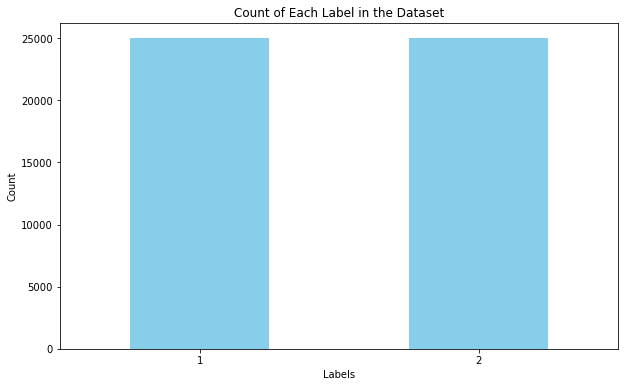

In [5]:
import matplotlib.pyplot as plt

# Count the occurrences of each label
label_counts = train_df['label'].value_counts().sort_index()

# Plot the bar graph
plt.figure(figsize=(10, 6))
label_counts.plot(kind='bar', color='skyblue')
plt.title('Count of Each Label in the Dataset')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


In [6]:

# Check for null values in train_df
null_values = train_df.isna().sum()

# Print the count of null values for each column
print(null_values)


label    0
text     0
dtype: int64


In [7]:
def update(df):
  df['label']=df['label'].apply(lambda x:0 if x==1 else 1)
  return df

train_df=update(train_df)
test_df=update(test_df)
# Verify the changes
print("train lables")
print(train_df['label'].value_counts())
print("test lables")
print(test_df['label'].value_counts())

# If you want to save the updated datasets back to CSV
train_df.to_csv('train_dataset_updated.csv', index=False)
test_df.to_csv('test_dataset_updated.csv', index=False)

train lables
label
1    25000
0    25000
Name: count, dtype: int64
test lables
label
1    19000
0    19000
Name: count, dtype: int64


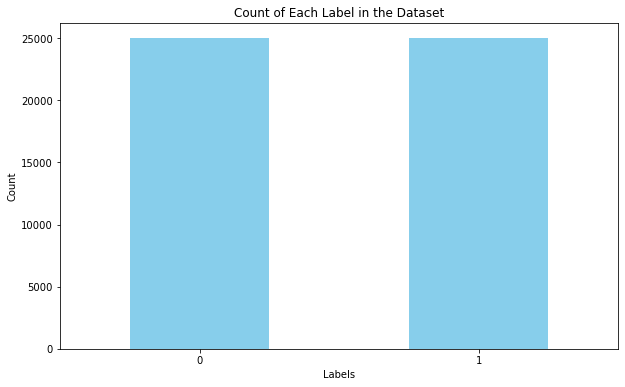

In [8]:
import matplotlib.pyplot as plt

# Count the occurrences of each label
label_counts = train_df['label'].value_counts().sort_index()

# Plot the bar graph
plt.figure(figsize=(10, 6))
label_counts.plot(kind='bar', color='skyblue')
plt.title('Count of Each Label in the Dataset')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


In [9]:
train_texts = train_df['text'].tolist()
train_labels = train_df['label'].tolist()
test_texts = test_df['text'].tolist()
test_labels = test_df['label'].tolist()

In [10]:
import re
# Function to clean text
def clean_text(text):
    # Remove special characters and punctuation
    text = re.sub(r"[^\w\s]", " ", text)
    # Remove single characters
    text = re.sub(r"\b[a-zA-Z]\b", " ", text)
    # Remove HTML tags
    text = re.sub(r"<[^>]*>", " ", text)
    # Lowercase the text
    text = text.lower()
    # Remove extra whitespace
    text = re.sub(r"\s+", " ", text)
    # Trim leading and trailing spaces
    text = text.strip()
    return text

In [11]:
train_df['text'] = train_df['text'].apply(clean_text)
test_df['text'] = test_df['text'].apply(clean_text)

# **Step 1: Normalize Text**

In [12]:
import re

# Example normalization function
def normalize_text(text):
    # Lowercase the text
    text = text.lower()
    # Remove special characters and punctuation
    text = re.sub(r"[^\w\s]", " ", text)
    # Remove extra whitespace
    text = re.sub(r"\s+", " ", text)
    # Trim leading and trailing spaces
    text = text.strip()
    return text

# Normalize the text in train and test datasets
train_df['normalized_text'] = train_df['text'].apply(normalize_text)
test_df['normalized_text'] = test_df['text'].apply(normalize_text)


# **Step 2: Expanding Contractions**

In [13]:
!pip install contractions --quiet

In [14]:
import contractions

# Expand contractions
def expand_contractions(text):
    return contractions.fix(text)

# Expand contractions in normalized text
train_df['expanded_text'] = train_df['normalized_text'].apply(expand_contractions)
test_df['expanded_text'] = test_df['normalized_text'].apply(expand_contractions)


# **Step 3: Tokenization**

In [ ]:
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

# Apply tokenization to expanded text
train_df['tokenized_text'] = train_df['expanded_text'].apply(word_tokenize)
test_df['tokenized_text'] = test_df['expanded_text'].apply(word_tokenize)


# **Step 4: Removing Stopwords**

In [ ]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

# Example stopwords removal function
def remove_stopwords(tokens):
    stop_words = set(stopwords.words('english'))
    return [word for word in tokens if word.lower() not in stop_words]

# Apply stopwords removal to tokenized text
train_df['filtered_text'] = train_df['tokenized_text'].apply(remove_stopwords)
test_df['filtered_text'] = test_df['tokenized_text'].apply(remove_stopwords)


# **Step 5: Stemming**

In [ ]:
from nltk.stem import PorterStemmer

# Example stemming function
def apply_stemming(tokens):
    stemmer = PorterStemmer()
    return [stemmer.stem(word) for word in tokens]

# Apply stemming to filtered text
train_df['stemmed_text'] = train_df['filtered_text'].apply(apply_stemming)
test_df['stemmed_text'] = test_df['filtered_text'].apply(apply_stemming)


# **Step 6: Lemmatization**

In [ ]:
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')

# Example lemmatization function
def apply_lemmatization(text): # Changed input to 'text' instead of 'tokens'
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(word) for word in text] # Iterate over words in 'text'

# Apply lemmatization to filtered text
train_df['lemmatized_text'] =train_df['stemmed_text'].apply(apply_lemmatization)
test_df['lemmatized_text'] = test_df['stemmed_text'].apply(apply_lemmatization)

# **SAVING THE FILE**

In [ ]:
import pickle
# Pickle train_df
with open('/data/nmamit-interns/grp3/new/train_df.pkl', 'wb') as f:
    pickle.dump(train_df, f)



In [ ]:
# Pickle test_df
with open('/data/nmamit-interns/grp3/new/test_df.pkl', 'wb') as f:
    pickle.dump(test_df, f)

# **LOADING THE FILE**

In [2]:
import pickle
# Load train_df from pickle
with open('/data/nmamit-interns/grp3/new/train_df.pkl', 'rb') as f:
    train_df = pickle.load(f)



In [3]:
# Load test_df from pickle
with open('/data/nmamit-interns/grp3/new/test_df.pkl', 'rb') as f:
    test_df = pickle.load(f)

In [4]:
train_df.head(2)

,label,text,normalized_text,expanded_text,tokenized_text,filtered_text,stemmed_text,lemmatized_text
258632,1,thought try new coffee shop so found this litt...,thought try new coffee shop so found this litt...,thought try new coffee shop so found this litt...,"[thought, try, new, coffee, shop, so, found, t...","[thought, try, new, coffee, shop, found, littl...","[thought, tri, new, coffe, shop, found, littl,...","[thought, tri, new, coffe, shop, found, littl,..."
433014,1,reasonable prices good variety of flavors and ...,reasonable prices good variety of flavors and ...,reasonable prices good variety of flavors and ...,"[reasonable, prices, good, variety, of, flavor...","[reasonable, prices, good, variety, flavors, l...","[reason, price, good, varieti, flavor, lot, to...","[reason, price, good, varieti, flavor, lot, to..."


In [5]:
train_df['final_text'] = train_df['lemmatized_text'].apply(' '.join)
test_df['final_text'] = test_df['lemmatized_text'].apply(' '.join)

In [6]:
train_df['final_text'].head(5)

258632    thought tri new coffe shop found littl place a...
433014    reason price good varieti flavor lot top choic...
558319    tini littl cafe perfectli place latta arcad eu...
383152    fianc ate last night order special sirloin ste...
52448     well think place 2003 friend took u good time ...
Name: final_text, dtype: object

In [7]:
texts = train_df['final_text']

# Calculate lengths of each text
text_lengths = texts.apply(len)

# Find maximum length
max_length = text_lengths.max()

print(f"Maximum length of text: {max_length}")

Maximum length of text: 3280


In [8]:
texts = test_df['final_text']

# Calculate lengths of each text
text_lengths = texts.apply(len)

# Find maximum length
max_length = text_lengths.max()

print(f"Maximum length of text: {max_length}")

Maximum length of text: 3385


In [9]:
texts = train_df['final_text']

# Calculate lengths of each text
text_lengths = texts.apply(len)

# Find maximum length
min_length = text_lengths.min()

print(f"Miniimum length of text: {min_length}")

Miniimum length of text: 0


In [10]:
texts = test_df['final_text']

# Calculate lengths of each text
text_lengths = texts.apply(len)

# Find maximum length
min_length = text_lengths.min()

print(f"Miniimum length of text: {min_length}")

Miniimum length of text: 0


In [11]:
# Calculate lengths of each text
text_lengths = train_df['final_text'].apply(len)

# Find the count of rows with text length 0
zero_length_count = (text_lengths == 0).sum()

print(f"Number of rows with text length 0: {zero_length_count}")


Number of rows with text length 0: 3


In [12]:
# Calculate lengths of each text
text_lengths = test_df['final_text'].apply(len)

# Find the count of rows with text length 0
zero_length_count = (text_lengths == 0).sum()

print(f"Number of rows with text length 0: {zero_length_count}")


Number of rows with text length 0: 2


In [13]:
# Calculate lengths of each text
text_lengths = train_df['final_text'].apply(len)

# Find the count of rows with text length 0
zero_length_count = (text_lengths == 0).sum()

print(f"Number of rows with text length 0: {zero_length_count}")

# Remove rows with text length 0
train_df = train_df[text_lengths != 0]

# Verify the removal
new_zero_length_count = (train_df['final_text'].apply(len) == 0).sum()
print(f"Number of rows with text length 0 after removal: {new_zero_length_count}")


Number of rows with text length 0: 3
Number of rows with text length 0 after removal: 0


In [14]:
# Calculate lengths of each text
text_lengths = test_df['final_text'].apply(len)

# Find the count of rows with text length 0
zero_length_count = (text_lengths == 0).sum()

print(f"Number of rows with text length 0: {zero_length_count}")

# Remove rows with text length 0
test_df = test_df[text_lengths != 0]

# Verify the removal
new_zero_length_count = (test_df['final_text'].apply(len) == 0).sum()
print(f"Number of rows with text length 0 after removal: {new_zero_length_count}")


Number of rows with text length 0: 2
Number of rows with text length 0 after removal: 0


In [15]:
def contains_number(text):
    return any(char.isdigit() for char in text)


if contains_number(train_df['final_text']):
    print("The text contains numbers.")
else:
    print("The text does not contain numbers.")


The text does not contain numbers.


## Importing the Required Libraries

In [16]:
from transformers import BertTokenizer, BertForSequenceClassification
import torch
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import torch.optim as optim


/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


 ## Splitting the Dataset

In [17]:
# Assuming you have a DIFFERENT column name in both train_df and test_df indicating sentiment labels, change 'label' to the correct column name
X_train, X_test, y_train, y_test = train_test_split(train_df['final_text'], train_df['label'], test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

# X_train: Training text data
# y_train: Training labels
# X_val: Validation text data
# y_val: Validation labels
# X_test: Test text data
# y_test: Test labels


## BERT BASED UNCASED CODE

## Tokenizing the Data

In [17]:
# Load the BERT tokenizer
tokenizer_bert = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenize the text data
train_encodings = tokenizer_bert (list(X_train), truncation=True, padding=True, return_tensors='pt')
val_encodings = tokenizer_bert (list(X_val), truncation=True, padding=True, return_tensors='pt')
test_encodings = tokenizer_bert (list(X_test), truncation=True, padding=True, return_tensors='pt')


## Creating Datasets and Dataloaders

In [18]:
# Convert to datasets
train_dataset = TensorDataset(train_encodings['input_ids'], train_encodings['attention_mask'], torch.tensor(y_train.values))
val_dataset = TensorDataset(val_encodings['input_ids'], val_encodings['attention_mask'], torch.tensor(y_val.values))
test_dataset = TensorDataset(test_encodings['input_ids'], test_encodings['attention_mask'], torch.tensor(y_test.values))

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)


## TRAINING THE DATASET(BERT BASED UNCASED)

In [19]:
from transformers import BertForSequenceClassification
import torch.optim as optim

# Load the model
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=3) 
# Set up training parameters
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
model.to(device)
optimizer = optim.AdamW(model.parameters(), lr=2e-5)
num_epochs = 4

# Training loop
for epoch in range(num_epochs):
    model.train()
    train_loss = 0
    for batch in train_loader:
        input_ids, attention_mask, labels = batch
        input_ids = input_ids.to(device)  
        attention_mask = attention_mask.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()

        train_loss += loss.item()

    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss/len(train_loader)}')

    # Evaluation on validation set
    model.eval()
    val_loss = 0
    all_predictions = []
    all_labels = []
    with torch.no_grad():
        for batch in val_loader:
            input_ids, attention_mask, labels = batch
            input_ids = input_ids.to(device)
            attention_mask = attention_mask.to(device)
            labels = labels.to(device)

            outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss
            val_loss += loss.item()

            logits = outputs.logits
            predictions = torch.argmax(logits, dim=1)
            all_predictions.extend(predictions.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    val_accuracy = accuracy_score(all_labels, all_predictions)
    val_precision, val_recall, val_f1, _ = precision_recall_fscore_support(all_labels, all_predictions, average='weighted')

    print(f'Validation Loss: {val_loss/len(val_loader)}')
    print(f'Validation Accuracy: {val_accuracy:.4f}')
    print(f'Validation Precision: {val_precision:.4f}')
    print(f'Validation Recall: {val_recall:.4f}')
    print(f'Validation F1-score: {val_f1:.4f}')


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch [1/4], Train Loss: 0.27247393919024615
Validation Loss: 0.18752876282952274
Validation Accuracy: 0.9256
Validation Precision: 0.9257
Validation Recall: 0.9256
Validation F1-score: 0.9256
Epoch [2/4], Train Loss: 0.15272895661515648
Validation Loss: 0.17759899881046515
Validation Accuracy: 0.9264
Validation Precision: 0.9266
Validation Recall: 0.9264
Validation F1-score: 0.9264
Epoch [3/4], Train Loss: 0.07904103365097544
Validation Loss: 0.2643244193186954
Validation Accuracy: 0.9322
Validation Precision: 0.9322
Validation Recall: 0.9322
Validation F1-score: 0.9322
Epoch [4/4], Train Loss: 0.04475000953337876
Validation Loss: 0.2539687862892385
Validation Accuracy: 0.9236
Validation Precision: 0.9253
Validation Recall: 0.9236
Validation F1-score: 0.9235


## Evaluating on the Test Set

In [48]:
# Evaluate on the test set
model.eval()
test_loss = 0
all_predictions = []
all_labels = []
with torch.no_grad():
    for batch in test_loader:
        input_ids, attention_mask, labels = batch
        input_ids = input_ids.to(device)
        attention_mask = attention_mask.to(device)
        labels = labels.to(device)

        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        test_loss += loss.item()

        logits = outputs.logits
        predictions = torch.argmax(logits, dim=1)
        all_predictions.extend(predictions.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

test_accuracy = accuracy_score(all_labels, all_predictions)
test_precision, test_recall, test_f1, _ = precision_recall_fscore_support(all_labels, all_predictions, average='weighted')

print(f'Test Loss: {test_loss/len(test_loader)}')
print(f'Test Accuracy: {test_accuracy:.4f}')
print(f'Test Precision: {test_precision:.4f}')
print(f'Test Recall: {test_recall:.4f}')
print(f'Test F1-score: {test_f1:.4f}')


Test Loss: 0.3003283167235961
Test Accuracy: 0.9276
Test Precision: 0.9278
Test Recall: 0.9276
Test F1-score: 0.9276


## Saving the BERT Model

In [20]:
model.save_pretrained('/data/nmamit-interns/grp3/new/all_models/model_bert')
tokenizer_bert.save_pretrained('/data/nmamit-interns/grp3/new/all_models/tokenizer_bert')

('/data/nmamit-interns/grp3/new/all_models/tokenizer_bert/tokenizer_config.json',
 '/data/nmamit-interns/grp3/new/all_models/tokenizer_bert/special_tokens_map.json',
 '/data/nmamit-interns/grp3/new/all_models/tokenizer_bert/vocab.txt',
 '/data/nmamit-interns/grp3/new/all_models/tokenizer_bert/added_tokens.json')

In [21]:
#confusion matrix
import torch
from transformers import BertTokenizer, BertForSequenceClassification
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report
import matplotlib.pyplot as plt
import numpy as np

#LOADING THE MODEL
tokenizer_bert = BertTokenizer.from_pretrained('/data/nmamit-interns/grp3/new/all_models/tokenizer_bert')
model_bert = BertForSequenceClassification.from_pretrained('/data/nmamit-interns/grp3/new/all_models/model_bert')

# Load your test data
test_texts = test_df['text'].tolist()
test_labels = test_df['label'].tolist()
# Move model to GPU if available
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
model_bert.to(device)

# Function to get predictions in batches
def get_predictions_in_batches(model, tokenizer, texts, batch_size=32):
    model.eval()
    all_predictions = []
    all_logits = []
    for i in range(0, len(texts), batch_size):
        batch_texts = texts[i:i + batch_size]
        encodings = tokenizer(batch_texts, truncation=True, padding=True, max_length=512, return_tensors='pt')
        encodings = {key: val.to(device) for key, val in encodings.items()}
        
        with torch.no_grad():
            outputs = model(**encodings)
            logits = outputs.logits
            predictions = torch.argmax(logits, dim=-1).cpu().numpy()
        
        all_predictions.extend(predictions)
        all_logits.extend(logits.cpu().numpy())
    
    return np.array(all_predictions), np.array(all_logits)

# Get predictions
predictions, logits = get_predictions_in_batches(model_bert,tokenizer_bert, test_texts)

# Calculate confusion matrix
cm = confusion_matrix(test_labels, predictions)
print("Confusion Matrix:\n", cm)

# Generate classification report
print("Classification Report:\n", classification_report(test_labels, predictions))

Confusion Matrix:
 [[16548  2450]
 [  533 18467]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.87      0.92     18998
           1       0.88      0.97      0.93     19000

    accuracy                           0.92     37998
   macro avg       0.93      0.92      0.92     37998
weighted avg       0.93      0.92      0.92     37998



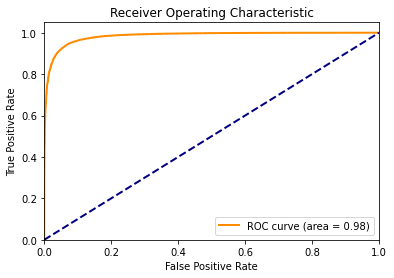

In [22]:
# Calculate ROC curve and AUC
if len(np.unique(test_labels)) == 2:
    fpr, tpr, _ = roc_curve(test_labels, logits[:, 1])
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()
else:
    print("ROC curve is only applicable for binary classification.")

In [25]:
import torch

# Function to predict a single sample from the test dataset
def predict_single_sample_from_test(test_df, model, tokenizer, sample_index):
    model.eval()
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model = model.to(device)
    
    with torch.no_grad():
        # Retrieve the specific sample from test_df
        text = test_df['text'].iloc[sample_index]
        label = test_df['label'].iloc[sample_index]
        
        # Tokenize the text
        inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True)
        input_ids = inputs['input_ids'].to(device)
        attention_mask = inputs['attention_mask'].to(device)
        
        # Make predictions
        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        predicted_label = torch.argmax(logits, dim=1).item()
        
        # Decode the input text
        decoded_text = tokenizer.decode(input_ids.squeeze().cpu(), skip_special_tokens=True)
        
        return decoded_text, predicted_label, label

# Example usage to predict a specific sample index from test_df
sample_index = 45# Example: predict the 3rd sample from test_df
decoded_text, predicted_label, actual_label = predict_single_sample_from_test(test_df, model_bert, tokenizer_bert, sample_index)

print(f'Input Text: {decoded_text}')
print(f'Predicted label: {predicted_label}')
print(f'Actual label: {actual_label}')


Input Text: my partner and were visiting my family in pittsburgh we live in san diego my partner was born and raised in portugal my mom heard about this resaurant and was excited to take my partner and to portuguese restaurant in pittsburgh we went looked at the menu and did not find anything portuguese on the menu why does this restaurant promote itself as portuguese fly the portuguese flag and not have any portuguese dishes we left
Predicted label: 1
Actual label: 0


In [27]:
import torch
import pandas as pd

# Function to predict all samples from the test dataset and identify false predictions
def get_false_predictions(test_df, model, tokenizer):
    model.eval()
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model = model.to(device)
    
    false_predictions = []
    
    with torch.no_grad():
        for index, row in test_df.iterrows():
            text = row['text']
            actual_label = row['label']
            
            # Tokenize the text
            inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True)
            input_ids = inputs['input_ids'].to(device)
            attention_mask = inputs['attention_mask'].to(device)
            
            # Make predictions
            outputs = model(input_ids, attention_mask=attention_mask)
            logits = outputs.logits
            predicted_label = torch.argmax(logits, dim=1).item()
            
            if predicted_label != actual_label:
                decoded_text = tokenizer.decode(input_ids.squeeze().cpu(), skip_special_tokens=True)
                false_predictions.append({
                    'text': decoded_text,
                    'predicted_label': predicted_label,
                    'actual_label': actual_label
                })
    
    return false_predictions

# Get false predictions
false_predictions = get_false_predictions(test_df, model_bert, tokenizer_bert)

# Create a DataFrame and save to CSV
false_predictions_df = pd.DataFrame(false_predictions)
false_predictions_df.to_csv('/data/nmamit-interns/grp3/new/false_predictions.csv', index=False)

print("False predictions saved to 'false_predictions.csv'")


False predictions saved to 'false_predictions.csv'


## Load the DistilBERT Tokenizer

In [24]:
import torch
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import torch.optim as optim


In [25]:
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')


In [27]:
# Encode datasets
train_encodings = tokenizer(list(X_train), truncation=True, padding=True, return_tensors='pt')
val_encodings = tokenizer(list(X_val), truncation=True, padding=True, return_tensors='pt')
test_encodings = tokenizer(list(X_test), truncation=True, padding=True, return_tensors='pt')

# Create TensorDatasets
train_dataset = TensorDataset(train_encodings['input_ids'], train_encodings['attention_mask'], torch.tensor(y_train.values))
val_dataset = TensorDataset(val_encodings['input_ids'], val_encodings['attention_mask'], torch.tensor(y_val.values))
test_dataset = TensorDataset(test_encodings['input_ids'], test_encodings['attention_mask'], torch.tensor(y_test.values))

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

# Initialize DistilBERT model for sequence classification
model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=3)  # Adjust num_labels based on your sentiment classes

# Set device (GPU if available, otherwise CPU)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Define optimizer
optimizer = optim.AdamW(model.parameters(), lr=2e-5)

# Training parameters
num_epochs = 3

# Training loop
for epoch in range(num_epochs):
    model.train()
    train_loss = 0
    for batch in train_loader:
        input_ids, attention_mask, labels = batch
        input_ids, attention_mask, labels = input_ids.to(device), attention_mask.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()

        train_loss += loss.item()

    # Print average train loss
    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss/len(train_loader):.4f}')

    # Evaluation on validation set
    model.eval()
    val_loss = 0
    all_predictions = []
    all_labels = []
    with torch.no_grad():
        for batch in val_loader:
            input_ids, attention_mask, labels = batch
            input_ids, attention_mask, labels = input_ids.to(device), attention_mask.to(device), labels.to(device)

            outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss
            val_loss += loss.item()

            logits = outputs.logits
            predictions = torch.argmax(logits, dim=1)
            all_predictions.extend(predictions.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    # Calculate validation metrics
    val_accuracy = accuracy_score(all_labels, all_predictions)
    val_precision, val_recall, val_f1, _ = precision_recall_fscore_support(all_labels, all_predictions, average='weighted')

    # Print validation metrics
    print(f'Validation Loss: {val_loss/len(val_loader):.4f}')
    print(f'Validation Accuracy: {val_accuracy:.4f}')
    print(f'Validation Precision: {val_precision:.4f}')
    print(f'Validation Recall: {val_recall:.4f}')
    print(f'Validation F1-score: {val_f1:.4f}')


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch [1/3], Train Loss: 0.2767
Validation Loss: 0.2172
Validation Accuracy: 0.9090
Validation Precision: 0.9118
Validation Recall: 0.9090
Validation F1-score: 0.9088
Epoch [2/3], Train Loss: 0.1610
Validation Loss: 0.2057
Validation Accuracy: 0.9192
Validation Precision: 0.9205
Validation Recall: 0.9192
Validation F1-score: 0.9191
Epoch [3/3], Train Loss: 0.0872
Validation Loss: 0.2098
Validation Accuracy: 0.9252
Validation Precision: 0.9252
Validation Recall: 0.9252
Validation F1-score: 0.9252


## Evaluate on the Test Set

In [23]:
model.eval()
test_loss = 0
all_predictions = []
all_labels = []
with torch.no_grad():
    for batch in test_loader:
        input_ids, attention_mask, labels = batch
        input_ids = input_ids.to(device)
        attention_mask = attention_mask.to(device)
        labels = labels.to(device)

        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        test_loss += loss.item()

        logits = outputs.logits
        predictions = torch.argmax(logits, dim=1)
        all_predictions.extend(predictions.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

test_accuracy = accuracy_score(all_labels, all_predictions)
test_precision, test_recall, test_f1, _ = precision_recall_fscore_support(all_labels, all_predictions, average='weighted')

print(f'Test Loss: {test_loss/len(test_loader)}')
print(f'Test Accuracy: {test_accuracy:.4f}')
print(f'Test Precision: {test_precision:.4f}')
print(f'Test Recall: {test_recall:.4f}')
print(f'Test F1-score: {test_f1:.4f}')


Test Loss: 0.36035749427423763
Test Accuracy: 0.9174
Test Precision: 0.9178
Test Recall: 0.9174
Test F1-score: 0.9174


In [29]:
#SAVING THE  DistilBERT MODEL
model.save_pretrained('/data/nmamit-interns/grp3/new/all_models/model_distilbert')
tokenizer.save_pretrained('/data/nmamit-interns/grp3/new/all_models/tokenizer_distilbert')

('/data/nmamit-interns/grp3/new/all_models/tokenizer_distilbert/tokenizer_config.json',
 '/data/nmamit-interns/grp3/new/all_models/tokenizer_distilbert/special_tokens_map.json',
 '/data/nmamit-interns/grp3/new/all_models/tokenizer_distilbert/vocab.txt',
 '/data/nmamit-interns/grp3/new/all_models/tokenizer_distilbert/added_tokens.json')

In [30]:
#confusion matrix
import torch
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report
import matplotlib.pyplot as plt
import numpy as np

#LOADING THE MODEL
tokenizer_distilbert = DistilBertTokenizer.from_pretrained('/data/nmamit-interns/grp3/new/all_models/tokenizer_distilbert')
model_distilbert = DistilBertForSequenceClassification.from_pretrained('/data/nmamit-interns/grp3/new/all_models/model_distilbert')

# Load your test data
test_texts = test_df['text'].tolist()
test_labels = test_df['label'].tolist()
# Move model to GPU if available
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
model_distilbert.to(device)

# Function to get predictions in batches
def get_predictions_in_batches(model, tokenizer, texts, batch_size=32):
    model.eval()
    all_predictions = []
    all_logits = []
    for i in range(0, len(texts), batch_size):
        batch_texts = texts[i:i + batch_size]
        encodings = tokenizer(batch_texts, truncation=True, padding=True, max_length=512, return_tensors='pt')
        encodings = {key: val.to(device) for key, val in encodings.items()}
        
        with torch.no_grad():
            outputs = model(**encodings)
            logits = outputs.logits
            predictions = torch.argmax(logits, dim=-1).cpu().numpy()
        
        all_predictions.extend(predictions)
        all_logits.extend(logits.cpu().numpy())
    
    return np.array(all_predictions), np.array(all_logits)

# Get predictions
predictions, logits = get_predictions_in_batches(model_distilbert,tokenizer_distilbert, test_texts)

# Calculate confusion matrix
cm = confusion_matrix(test_labels, predictions)
print("Confusion Matrix:\n", cm)

# Generate classification report
print("Classification Report:\n", classification_report(test_labels, predictions))

Confusion Matrix:
 [[18239   759]
 [ 2377 16623]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92     18998
           1       0.96      0.87      0.91     19000

    accuracy                           0.92     37998
   macro avg       0.92      0.92      0.92     37998
weighted avg       0.92      0.92      0.92     37998



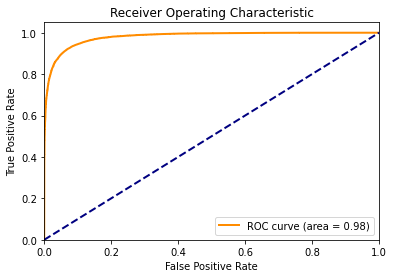

In [31]:
# Calculate ROC curve and AUC
if len(np.unique(test_labels)) == 2:
    fpr, tpr, _ = roc_curve(test_labels, logits[:, 1])
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()
else:
    print("ROC curve is only applicable for binary classification.")

## **PREDICTION**

In [43]:
test_df.head()

,label,text,normalized_text,expanded_text,tokenized_text,filtered_text,stemmed_text,lemmatized_text,final_text
0,1,contrary to other reviews have zero complaints...,contrary to other reviews have zero complaints...,contrary to other reviews have zero complaints...,"[contrary, to, other, reviews, have, zero, com...","[contrary, reviews, zero, complaints, service,...","[contrari, review, zero, complaint, servic, pr...","[contrari, review, zero, complaint, servic, pr...",contrari review zero complaint servic price ge...
1,0,last summer had an appointment to get new tire...,last summer had an appointment to get new tire...,last summer had an appointment to get new tire...,"[last, summer, had, an, appointment, to, get, ...","[last, summer, appointment, get, new, tires, w...","[last, summer, appoint, get, new, tire, wait, ...","[last, summer, appoint, get, new, tire, wait, ...",last summer appoint get new tire wait super lo...
2,1,friendly staff same starbucks fair you get any...,friendly staff same starbucks fair you get any...,friendly staff same starbucks fair you get any...,"[friendly, staff, same, starbucks, fair, you, ...","[friendly, staff, starbucks, fair, get, anywhe...","[friendli, staff, starbuck, fair, get, anywher...","[friendli, staff, starbuck, fair, get, anywher...",friendli staff starbuck fair get anywher el so...
3,0,the food is good unfortunately the service is ...,the food is good unfortunately the service is ...,the food is good unfortunately the service is ...,"[the, food, is, good, unfortunately, the, serv...","[food, good, unfortunately, service, hit, miss...","[food, good, unfortun, servic, hit, miss, main...","[food, good, unfortun, servic, hit, miss, main...",food good unfortun servic hit miss main issu s...
4,1,even when we didn have car filene basement was...,even when we didn have car filene basement was...,even when we didn have car filene basement was...,"[even, when, we, didn, have, car, filene, base...","[even, car, filene, basement, worth, bus, trip...","[even, car, filen, basement, worth, bu, trip, ...","[even, car, filen, basement, worth, bu, trip, ...",even car filen basement worth bu trip waterfro...


In [54]:
import torch

# Function to predict a single sample from the test dataset
def predict_single_sample_from_test(test_df, model, tokenizer, sample_index):
    model.eval()
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model = model.to(device)
    
    with torch.no_grad():
        # Retrieve the specific sample from test_df
        text = test_df['text'].iloc[sample_index]
        label = test_df['label'].iloc[sample_index]
        
        # Tokenize the text
        inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True)
        input_ids = inputs['input_ids'].to(device)
        attention_mask = inputs['attention_mask'].to(device)
        
        # Make predictions
        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        predicted_label = torch.argmax(logits, dim=1).item()
        
        # Decode the input text
        decoded_text = tokenizer.decode(input_ids.squeeze().cpu(), skip_special_tokens=True)
        
        return decoded_text, predicted_label, label

# Example usage to predict a specific sample index from test_df
sample_index = 3  # Example: predict the 3rd sample from test_df
decoded_text, predicted_label, actual_label = predict_single_sample_from_test(test_df, model_distilbert, tokenizer_distilbert, sample_index)

print(f'Input Text: {decoded_text}')
print(f'Predicted label: {predicted_label}')
print(f'Actual label: {actual_label}')


Input Text: the food is good unfortunately the service is very hit or miss the main issue seems to be with the kitchen the waiters and waitresses are often very apologetic for the long waits and it pretty obvious that some of them avoid the tables after taking the initial order to avoid hearing complaints
Predicted label: 0
Actual label: 0


## ROBERTA code

In [55]:
import torch
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from transformers import RobertaTokenizer, RobertaForSequenceClassification
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import torch.optim as optim


In [57]:

# Initialize tokenizer
tokenizer_roberta = RobertaTokenizer.from_pretrained('roberta-base')

# Encode datasets
train_encodings = tokenizer_roberta(list(X_train), truncation=True, padding=True, return_tensors='pt')
val_encodings = tokenizer_roberta(list(X_val), truncation=True, padding=True, return_tensors='pt')
test_encodings = tokenizer_roberta(list(X_test), truncation=True, padding=True, return_tensors='pt')

# Create TensorDatasets
train_dataset = TensorDataset(train_encodings['input_ids'], train_encodings['attention_mask'], torch.tensor(y_train.values))
val_dataset = TensorDataset(val_encodings['input_ids'], val_encodings['attention_mask'], torch.tensor(y_val.values))
test_dataset = TensorDataset(test_encodings['input_ids'], test_encodings['attention_mask'], torch.tensor(y_test.values))

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

# Initialize RoBERTa model for sequence classification
roberta_model = RobertaForSequenceClassification.from_pretrained('roberta-base', num_labels=3)  # Adjust num_labels based on your sentiment classes

# Set device (GPU if available, otherwise CPU)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
roberta_model.to(device)

# Define optimizer
optimizer = optim.AdamW(roberta_model.parameters(), lr=2e-5)

# Training parameters
num_epochs = 2

# Training loop
for epoch in range(num_epochs):
    roberta_model.train()
    train_loss = 0
    for batch in train_loader:
        input_ids, attention_mask, labels = batch
        input_ids = input_ids.to(device)
        attention_mask = attention_mask.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = roberta_model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()

        train_loss += loss.item()

    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss/len(train_loader)}')

    # Evaluation on validation set
    roberta_model.eval()
    val_loss = 0
    all_predictions = []
    all_labels = []
    with torch.no_grad():
        for batch in val_loader:
            input_ids, attention_mask, labels = batch
            input_ids = input_ids.to(device)
            attention_mask = attention_mask.to(device)
            labels = labels.to(device)

            outputs = roberta_model(input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss
            val_loss += loss.item()

            logits = outputs.logits
            predictions = torch.argmax(logits, dim=1)
            all_predictions.extend(predictions.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    val_accuracy = accuracy_score(all_labels, all_predictions)
    val_precision, val_recall, val_f1, _ = precision_recall_fscore_support(all_labels, all_predictions, average='weighted')

    print(f'Validation Loss: {val_loss/len(val_loader)}')
    print(f'Validation Accuracy: {val_accuracy:.4f}')
    print(f'Validation Precision: {val_precision:.4f}')
    print(f'Validation Recall: {val_recall:.4f}')
    print(f'Validation F1-score: {val_f1:.4f}')


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch [1/2], Train Loss: 0.2706151846098714
Validation Loss: 0.18208724041037952
Validation Accuracy: 0.9264
Validation Precision: 0.9281
Validation Recall: 0.9264
Validation F1-score: 0.9263
Epoch [2/2], Train Loss: 0.17067785046065692
Validation Loss: 0.16095841463250568
Validation Accuracy: 0.9384
Validation Precision: 0.9385
Validation Recall: 0.9384
Validation F1-score: 0.9384


## Evaluate on the Test Set

In [25]:
model.eval()
test_loss = 0
all_predictions = []
all_labels = []
with torch.no_grad():
    for batch in test_loader:
        input_ids, attention_mask, labels = batch
        input_ids = input_ids.to(device)
        attention_mask = attention_mask.to(device)
        labels = labels.to(device)

        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        test_loss += loss.item()

        logits = outputs.logits
        predictions = torch.argmax(logits, dim=1)
        all_predictions.extend(predictions.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

test_accuracy = accuracy_score(all_labels, all_predictions)
test_precision, test_recall, test_f1, _ = precision_recall_fscore_support(all_labels, all_predictions, average='weighted')

print(f'Test Loss: {test_loss/len(test_loader)}')
print(f'Test Accuracy: {test_accuracy:.4f}')
print(f'Test Precision: {test_precision:.4f}')
print(f'Test Recall: {test_recall:.4f}')
print(f'Test F1-score: {test_f1:.4f}')


Test Loss: 0.24833239774374416
Test Accuracy: 0.9230
Test Precision: 0.9245
Test Recall: 0.9230
Test F1-score: 0.9230


In [58]:
roberta_model.save_pretrained('/data/nmamit-interns/grp3/new/all_models/model_roberta')
tokenizer_roberta.save_pretrained('/data/nmamit-interns/grp3/new/all_models/tokenizer_roberta')

('/data/nmamit-interns/grp3/new/all_models/tokenizer_roberta/tokenizer_config.json',
 '/data/nmamit-interns/grp3/new/all_models/tokenizer_roberta/special_tokens_map.json',
 '/data/nmamit-interns/grp3/new/all_models/tokenizer_roberta/vocab.json',
 '/data/nmamit-interns/grp3/new/all_models/tokenizer_roberta/merges.txt',
 '/data/nmamit-interns/grp3/new/all_models/tokenizer_roberta/added_tokens.json')

In [19]:
from transformers import RobertaTokenizer, RobertaForSequenceClassification
#LOADING THE MODEL
tokenizer_roberta = RobertaTokenizer.from_pretrained('/data/nmamit-interns/grp3/new/all_models/tokenizer_roberta')
model_roberta = RobertaForSequenceClassification.from_pretrained('/data/nmamit-interns/grp3/new/all_models/model_roberta')

In [60]:
#confusion matrix
import torch
from transformers import RobertaTokenizer, RobertaForSequenceClassification
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report
import matplotlib.pyplot as plt
import numpy as np

#LOADING THE MODEL
tokenizer_roberta = RobertaTokenizer.from_pretrained('/data/nmamit-interns/grp3/new/all_models/tokenizer_roberta')
model_roberta = RobertaForSequenceClassification.from_pretrained('/data/nmamit-interns/grp3/new/all_models/model_roberta')

# Load your test data
test_texts = test_df['text'].tolist()
test_labels = test_df['label'].tolist()
# Move model to GPU if available
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
model_roberta.to(device)

# Function to get predictions in batches
def get_predictions_in_batches(model, tokenizer, texts, batch_size=32):
    model.eval()
    all_predictions = []
    all_logits = []
    for i in range(0, len(texts), batch_size):
        batch_texts = texts[i:i + batch_size]
        encodings = tokenizer(batch_texts, truncation=True, padding=True, max_length=512, return_tensors='pt')
        encodings = {key: val.to(device) for key, val in encodings.items()}
        
        with torch.no_grad():
            outputs = model(**encodings)
            logits = outputs.logits
            predictions = torch.argmax(logits, dim=-1).cpu().numpy()
        
        all_predictions.extend(predictions)
        all_logits.extend(logits.cpu().numpy())
    
    return np.array(all_predictions), np.array(all_logits)

# Get predictions
predictions, logits = get_predictions_in_batches(model_roberta,tokenizer_roberta, test_texts)

# Calculate confusion matrix
cm = confusion_matrix(test_labels, predictions)
print("Confusion Matrix:\n", cm)

# Generate classification report
print("Classification Report:\n", classification_report(test_labels, predictions))

Confusion Matrix:
 [[17990  1008]
 [  727 18273]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.95     18998
           1       0.95      0.96      0.95     19000

    accuracy                           0.95     37998
   macro avg       0.95      0.95      0.95     37998
weighted avg       0.95      0.95      0.95     37998



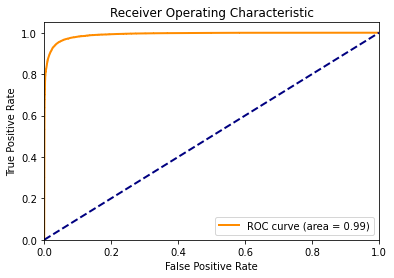

In [61]:
# Calculate ROC curve and AUC
if len(np.unique(test_labels)) == 2:
    fpr, tpr, _ = roc_curve(test_labels, logits[:, 1])
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()
else:
    print("ROC curve is only applicable for binary classification.")

In [65]:
import torch

# Function to predict a single sample from the test dataset
def predict_single_sample_from_test(test_df, model, tokenizer, sample_index):
    model.eval()
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model = model.to(device)
    
    with torch.no_grad():
        # Retrieve the specific sample from test_df
        text = test_df['text'].iloc[sample_index]
        label = test_df['label'].iloc[sample_index]
        
        # Tokenize the text
        inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True)
        input_ids = inputs['input_ids'].to(device)
        attention_mask = inputs['attention_mask'].to(device)
        
        # Make predictions
        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        predicted_label = torch.argmax(logits, dim=1).item()
        
        # Decode the input text
        decoded_text = tokenizer.decode(input_ids.squeeze().cpu(), skip_special_tokens=True)
        
        return decoded_text, predicted_label, label

# Example usage to predict a specific sample index from test_df
sample_index = 6  # Example: predict the 3rd sample from test_df
decoded_text, predicted_label, actual_label = predict_single_sample_from_test(test_df, model_roberta, tokenizer_roberta, sample_index)

print(f'Input Text: {decoded_text}')
print(f'Predicted label: {predicted_label}')
print(f'Actual label: {actual_label}')


Input Text: mediocre service cold food our food waited so long the lettuce pickles wilted bland food crazy overpriced long waits in the arcade 1 beer per hour maximum avoid at all costs fair manager
Predicted label: 0
Actual label: 0


In [21]:
import torch
import pandas as pd

# Function to predict all samples from the test dataset and identify false predictions
def get_false_predictions(test_df, model, tokenizer):
    model.eval()
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model = model.to(device)
    
    false_predictions = []
    
    with torch.no_grad():
        for index, row in test_df.iterrows():
            text = row['text']
            actual_label = row['label']
            
            # Tokenize the text
            inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True)
            input_ids = inputs['input_ids'].to(device)
            attention_mask = inputs['attention_mask'].to(device)
            
            # Make predictions
            outputs = model(input_ids, attention_mask=attention_mask)
            logits = outputs.logits
            predicted_label = torch.argmax(logits, dim=1).item()
            
            if predicted_label != actual_label:
                decoded_text = tokenizer.decode(input_ids.squeeze().cpu(), skip_special_tokens=True)
                false_predictions.append({
                    'text': decoded_text,
                    'predicted_label': predicted_label,
                    'actual_label': actual_label
                })
    
    return false_predictions

# Get false predictions
false_predictions = get_false_predictions(test_df, model_roberta, tokenizer_roberta)

# Create a DataFrame and save to CSV
false_predictions_df = pd.DataFrame(false_predictions)
false_predictions_df.to_csv('/data/nmamit-interns/grp3/new/false2_predictions.csv', index=False)

print("False predictions saved to 'false_predictions.csv'")


False predictions saved to 'false_predictions.csv'


## ALBERTa

In [70]:
import torch
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from transformers import AlbertTokenizer, AlbertForSequenceClassification
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import torch.optim as optim

In [73]:
import torch
from transformers import AlbertForSequenceClassification, AlbertTokenizer
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import torch.optim as optim

# Assuming alberta_model and alberta_tokenizer are loaded from 'alberta-base-v2'
alberta_tokenizer = AlbertTokenizer.from_pretrained('albert-base-v2')

train_encodings = alberta_tokenizer(list(X_train), truncation=True, padding=True, return_tensors='pt')
val_encodings = alberta_tokenizer(list(X_val), truncation=True, padding=True, return_tensors='pt')
test_encodings = alberta_tokenizer(list(X_test), truncation=True, padding=True, return_tensors='pt')

train_dataset = TensorDataset(train_encodings['input_ids'], train_encodings['attention_mask'], torch.tensor(y_train.values))
val_dataset = TensorDataset(val_encodings['input_ids'], val_encodings['attention_mask'], torch.tensor(y_val.values))
test_dataset = TensorDataset(test_encodings['input_ids'], test_encodings['attention_mask'], torch.tensor(y_test.values))

train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

alberta_model = AlbertForSequenceClassification.from_pretrained('albert-base-v2', num_labels=3)  
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
alberta_model.to(device)
optimizer = optim.AdamW(alberta_model.parameters(), lr=2e-5)

num_epochs = 3
for epoch in range(num_epochs):
    alberta_model.train()
    train_loss = 0
    for batch in train_loader:
        input_ids, attention_mask, labels = batch
        input_ids = input_ids.to(device)
        attention_mask = attention_mask.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = alberta_model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()

        train_loss += loss.item()

    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss/len(train_loader)}')

    # Evaluation on validation set
    alberta_model.eval()
    val_loss = 0
    all_predictions = []
    all_labels = []
    with torch.no_grad():
        for batch in val_loader:
            input_ids, attention_mask, labels = batch
            input_ids = input_ids.to(device)
            attention_mask = attention_mask.to(device)
            labels = labels.to(device)

            outputs = alberta_model(input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss
            val_loss += loss.item()

            logits = outputs.logits
            predictions = torch.argmax(logits, dim=1)
            all_predictions.extend(predictions.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    val_accuracy = accuracy_score(all_labels, all_predictions)
    val_precision, val_recall, val_f1, _ = precision_recall_fscore_support(all_labels, all_predictions, average='weighted')

    print(f'Validation Loss: {val_loss/len(val_loader)}')
    print(f'Validation Accuracy: {val_accuracy:.4f}')
    print(f'Validation Precision: {val_precision:.4f}')
    print(f'Validation Recall: {val_recall:.4f}')
    print(f'Validation F1-score: {val_f1:.4f}')


Some weights of AlbertForSequenceClassification were not initialized from the model checkpoint at albert-base-v2 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch [1/3], Train Loss: 0.3340317437509075
Validation Loss: 0.2667958633170817
Validation Accuracy: 0.8924
Validation Precision: 0.8979
Validation Recall: 0.8924
Validation F1-score: 0.8920
Epoch [2/3], Train Loss: 0.21599592599128373
Validation Loss: 0.2144722283309022
Validation Accuracy: 0.9148
Validation Precision: 0.9154
Validation Recall: 0.9148
Validation F1-score: 0.9148
Epoch [3/3], Train Loss: 0.16025632768808865
Validation Loss: 0.2015432677508448
Validation Accuracy: 0.9234
Validation Precision: 0.9236
Validation Recall: 0.9234
Validation F1-score: 0.9234


 ## Evaluate on the Test Set

In [74]:
alberta_model.eval()  
test_loss = 0
all_predictions = []
all_labels = []

with torch.no_grad():
    for batch in test_loader:
        input_ids, attention_mask, labels = batch
        input_ids = input_ids.to(device)
        attention_mask = attention_mask.to(device)
        labels = labels.to(device)

        outputs = alberta_model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        test_loss += loss.item()

        logits = outputs.logits
        predictions = torch.argmax(logits, dim=1)
        all_predictions.extend(predictions.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

test_accuracy = accuracy_score(all_labels, all_predictions)
test_precision, test_recall, test_f1, _ = precision_recall_fscore_support(all_labels, all_predictions, average='weighted')

print(f'Test Loss: {test_loss/len(test_loader)}')
print(f'Test Accuracy: {test_accuracy:.4f}')
print(f'Test Precision: {test_precision:.4f}')
print(f'Test Recall: {test_recall:.4f}')
print(f'Test F1-score: {test_f1:.4f}')


Test Loss: 0.22260132557548845
Test Accuracy: 0.9112
Test Precision: 0.9114
Test Recall: 0.9112
Test F1-score: 0.9112


In [75]:
alberta_model.save_pretrained('/data/nmamit-interns/grp3/new/all_models/model_albert')
alberta_tokenizer.save_pretrained('/data/nmamit-interns/grp3/new/all_models/tokenizer_albert')

('/data/nmamit-interns/grp3/new/all_models/tokenizer_albert/tokenizer_config.json',
 '/data/nmamit-interns/grp3/new/all_models/tokenizer_albert/special_tokens_map.json',
 '/data/nmamit-interns/grp3/new/all_models/tokenizer_albert/spiece.model',
 '/data/nmamit-interns/grp3/new/all_models/tokenizer_albert/added_tokens.json')

In [76]:
#confusion matrix
import torch
from transformers import AlbertTokenizer, AlbertForSequenceClassification
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report
import matplotlib.pyplot as plt
import numpy as np

#LOADING THE MODEL
tokenizer_albert = AlbertTokenizer.from_pretrained('/data/nmamit-interns/grp3/new/all_models/tokenizer_albert')
model_albert = AlbertForSequenceClassification.from_pretrained('/data/nmamit-interns/grp3/new/all_models/model_albert')

# Load your test data
test_texts = test_df['text'].tolist()
test_labels = test_df['label'].tolist()
# Move model to GPU if available
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
model_albert.to(device)

# Function to get predictions in batches
def get_predictions_in_batches(model, tokenizer, texts, batch_size=32):
    model.eval()
    all_predictions = []
    all_logits = []
    for i in range(0, len(texts), batch_size):
        batch_texts = texts[i:i + batch_size]
        encodings = tokenizer(batch_texts, truncation=True, padding=True, max_length=512, return_tensors='pt')
        encodings = {key: val.to(device) for key, val in encodings.items()}
        
        with torch.no_grad():
            outputs = model(**encodings)
            logits = outputs.logits
            predictions = torch.argmax(logits, dim=-1).cpu().numpy()
        
        all_predictions.extend(predictions)
        all_logits.extend(logits.cpu().numpy())
    
    return np.array(all_predictions), np.array(all_logits)

# Get predictions
predictions, logits = get_predictions_in_batches(model_albert,tokenizer_albert, test_texts)

# Calculate confusion matrix
cm = confusion_matrix(test_labels, predictions)
print("Confusion Matrix:\n", cm)

# Generate classification report
print("Classification Report:\n", classification_report(test_labels, predictions))


Confusion Matrix:
 [[17381  1617]
 [ 1969 17031]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.91      0.91     18998
           1       0.91      0.90      0.90     19000

    accuracy                           0.91     37998
   macro avg       0.91      0.91      0.91     37998
weighted avg       0.91      0.91      0.91     37998



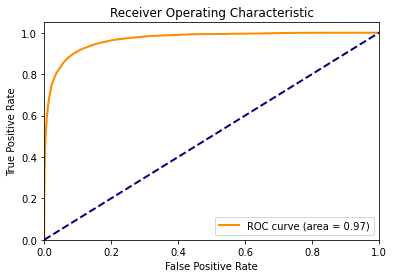

In [77]:
# Calculate ROC curve and AUC
if len(np.unique(test_labels)) == 2:
    fpr, tpr, _ = roc_curve(test_labels, logits[:, 1])
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()
else:
    print("ROC curve is only applicable for binary classification.")

In [79]:
import torch

# Function to predict a single sample from the test dataset
def predict_single_sample_from_test(test_df, model, tokenizer, sample_index):
    model.eval()
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model = model.to(device)
    
    with torch.no_grad():
        # Retrieve the specific sample from test_df
        text = test_df['text'].iloc[sample_index]
        label = test_df['label'].iloc[sample_index]
        
        # Tokenize the text
        inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True)
        input_ids = inputs['input_ids'].to(device)
        attention_mask = inputs['attention_mask'].to(device)
        
        # Make predictions
        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        predicted_label = torch.argmax(logits, dim=1).item()
        
        # Decode the input text
        decoded_text = tokenizer.decode(input_ids.squeeze().cpu(), skip_special_tokens=True)
        
        return decoded_text, predicted_label, label

# Example usage to predict a specific sample index from test_df
sample_index = 0  # Example: predict the 3rd sample from test_df
decoded_text, predicted_label, actual_label = predict_single_sample_from_test(test_df, model_albert, tokenizer_albert, sample_index)

print(f'Input Text: {decoded_text}')
print(f'Predicted label: {predicted_label}')
print(f'Actual label: {actual_label}')


Input Text: contrary to other reviews have zero complaints about the service or the prices have been getting tire service here for the past 5 years now and compared to my experience with places like pep boys these guys are experienced and know what they re doing nalso this is one place that do not feel like am being taken advantage of just because of my gender other auto mechanics have been notorious for capitalizing on my ignorance of cars and have sucked my bank account dry but here my service and road coverage has all been well explained and let up to me to decide nand they just renovated the waiting room it looks lot better than it did in previous years
Predicted label: 0
Actual label: 1


## DistilRoberta code

In [26]:
import torch
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import torch.optim as optim


In [27]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

# Remove cached files
AutoTokenizer.from_pretrained('distilroberta-base', cache_dir='./cache', force_download=True)


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

RobertaTokenizerFast(name_or_path='distilroberta-base', vocab_size=50265, model_max_length=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'bos_token': '<s>', 'eos_token': '</s>', 'unk_token': '<unk>', 'sep_token': '</s>', 'pad_token': '<pad>', 'cls_token': '<s>', 'mask_token': '<mask>'}, clean_up_tokenization_spaces=True),  added_tokens_decoder={
	0: AddedToken("<s>", rstrip=False, lstrip=False, single_word=False, normalized=True, special=True),
	1: AddedToken("<pad>", rstrip=False, lstrip=False, single_word=False, normalized=True, special=True),
	2: AddedToken("</s>", rstrip=False, lstrip=False, single_word=False, normalized=True, special=True),
	3: AddedToken("<unk>", rstrip=False, lstrip=False, single_word=False, normalized=True, special=True),
	50264: AddedToken("<mask>", rstrip=False, lstrip=True, single_word=False, normalized=False, special=True),
}

In [30]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

# Initialize tokenizer
distilroberta_tokenizer = AutoTokenizer.from_pretrained('distilroberta-base')

# Initialize model
distilroberta_model = AutoModelForSequenceClassification.from_pretrained('distilroberta-base', num_labels=3)
#here remember the speed

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at distilroberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [33]:

# Encode datasets
train_encodings = distilroberta_tokenizer(list(X_train), truncation=True, padding=True, return_tensors='pt')
val_encodings = distilroberta_tokenizer(list(X_val), truncation=True, padding=True, return_tensors='pt')
test_encodings = distilroberta_tokenizer(list(X_test), truncation=True, padding=True, return_tensors='pt')

# Create TensorDatasets
train_dataset = TensorDataset(train_encodings['input_ids'], train_encodings['attention_mask'], torch.tensor(y_train.values))
val_dataset = TensorDataset(val_encodings['input_ids'], val_encodings['attention_mask'], torch.tensor(y_val.values))
test_dataset = TensorDataset(test_encodings['input_ids'], test_encodings['attention_mask'], torch.tensor(y_test.values))

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

# Initialize model
distilroberta_model = DistilBertForSequenceClassification.from_pretrained('distilroberta-base', num_labels=3)  # Adjust num_labels based on your sentiment classes

# Set device
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
distilroberta_model.to(device)

# Set optimizer
optimizer = optim.AdamW(distilroberta_model.parameters(), lr=2e-5)

# Training and evaluation loop
num_epochs = 3
for epoch in range(num_epochs):
    distilroberta_model.train()
    train_loss = 0
    for batch in train_loader:
        input_ids, attention_mask, labels = batch
        input_ids = input_ids.to(device)
        attention_mask = attention_mask.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = distilroberta_model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()

        train_loss += loss.item()

    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss/len(train_loader)}')

    # Evaluation on validation set
    distilroberta_model.eval()
    val_loss = 0
    all_predictions = []
    all_labels = []
    with torch.no_grad():
        for batch in val_loader:
            input_ids, attention_mask, labels = batch
            input_ids = input_ids.to(device)
            attention_mask = attention_mask.to(device)
            labels = labels.to(device)

            outputs = distilroberta_model(input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss
            val_loss += loss.item()

            logits = outputs.logits
            predictions = torch.argmax(logits, dim=1)
            all_predictions.extend(predictions.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    val_accuracy = accuracy_score(all_labels, all_predictions)
    val_precision, val_recall, val_f1, _ = precision_recall_fscore_support(all_labels, all_predictions, average='weighted')

    print(f'Validation Loss: {val_loss/len(val_loader)}')
    print(f'Validation Accuracy: {val_accuracy:.4f}')
    print(f'Validation Precision: {val_precision:.4f}')
    print(f'Validation Recall: {val_recall:.4f}')
    print(f'Validation F1-score: {val_f1:.4f}')


You are using a model of type roberta to instantiate a model of type distilbert. This is not supported for all configurations of models and can yield errors.
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilroberta-base and are newly initialized: ['classifier.bias', 'classifier.weight', 'embeddings.LayerNorm.bias', 'embeddings.LayerNorm.weight', 'embeddings.position_embeddings.weight', 'embeddings.word_embeddings.weight', 'pre_classifier.bias', 'pre_classifier.weight', 'transformer.layer.0.attention.k_lin.bias', 'transformer.layer.0.attention.k_lin.weight', 'transformer.layer.0.attention.out_lin.bias', 'transformer.layer.0.attention.out_lin.weight', 'transformer.layer.0.attention.q_lin.bias', 'transformer.layer.0.attention.q_lin.weight', 'transformer.layer.0.attention.v_lin.bias', 'transformer.layer.0.attention.v_lin.weight', 'transformer.layer.0.ffn.lin1.bias', 'transformer.layer.0.ffn.lin1.weight', 'transformer.layer.0.ffn.li

Epoch [1/3], Train Loss: 0.3151386135125533
Validation Loss: 0.24076746860608317
Validation Accuracy: 0.9014
Validation Precision: 0.9040
Validation Recall: 0.9014
Validation F1-score: 0.9012
Epoch [2/3], Train Loss: 0.213956016928982
Validation Loss: 0.23593522022112298
Validation Accuracy: 0.8972
Validation Precision: 0.8994
Validation Recall: 0.8972
Validation F1-score: 0.8971
Epoch [3/3], Train Loss: 0.1855966711871326
Validation Loss: 0.25218581763384773
Validation Accuracy: 0.9044
Validation Precision: 0.9052
Validation Recall: 0.9044
Validation F1-score: 0.9043


In [35]:
# Evaluation on test set
distilroberta_model.eval()
test_loss = 0
all_predictions = []
all_labels = []
with torch.no_grad():
    for batch in test_loader:
        input_ids, attention_mask, labels = batch
        input_ids = input_ids.to(device)
        attention_mask = attention_mask.to(device)
        labels = labels.to(device)

        outputs = distilroberta_model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        test_loss += loss.item()

        logits = outputs.logits
        predictions = torch.argmax(logits, dim=1)
        all_predictions.extend(predictions.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

test_accuracy = accuracy_score(all_labels, all_predictions)
test_precision, test_recall, test_f1, _ = precision_recall_fscore_support(all_labels, all_predictions, average='weighted')

print(f'Test Loss: {test_loss/len(test_loader)}')
print(f'Test Accuracy: {test_accuracy:.4f}')
print(f'Test Precision: {test_precision:.4f}')
print(f'Test Recall: {test_recall:.4f}')
print(f'Test F1-score: {test_f1:.4f}')


Test Loss: 0.24460058358197395
Test Accuracy: 0.9066
Test Precision: 0.9072
Test Recall: 0.9066
Test F1-score: 0.9065


In [36]:
distilroberta_model.save_pretrained('/data/nmamit-interns/grp3/new/all_models/model_distilroberta')
distilroberta_tokenizer.save_pretrained('/data/nmamit-interns/grp3/new/all_models/tokenizer_distilroberta')

('/data/nmamit-interns/grp3/new/all_models/tokenizer_distilroberta/tokenizer_config.json',
 '/data/nmamit-interns/grp3/new/all_models/tokenizer_distilroberta/special_tokens_map.json',
 '/data/nmamit-interns/grp3/new/all_models/tokenizer_distilroberta/vocab.json',
 '/data/nmamit-interns/grp3/new/all_models/tokenizer_distilroberta/merges.txt',
 '/data/nmamit-interns/grp3/new/all_models/tokenizer_distilroberta/added_tokens.json',
 '/data/nmamit-interns/grp3/new/all_models/tokenizer_distilroberta/tokenizer.json')

In [37]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
distilroberta_model=AutoModelForSequenceClassification.from_pretrained('/data/nmamit-interns/grp3/new/all_models/model_distilroberta')
distilroberta_tokenizer=AutoTokenizer.from_pretrained('/data/nmamit-interns/grp3/new/all_models/tokenizer_distilroberta')

In [38]:
#confusion matrix
import torch
from transformers import AlbertTokenizer, AlbertForSequenceClassification
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report
import matplotlib.pyplot as plt
import numpy as np

# Load your test data
test_texts = test_df['text'].tolist()
test_labels = test_df['label'].tolist()
# Move model to GPU if available
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
distilroberta_model.to(device)

# Function to get predictions in batches
def get_predictions_in_batches(model, tokenizer, texts, batch_size=32):
    model.eval()
    all_predictions = []
    all_logits = []
    for i in range(0, len(texts), batch_size):
        batch_texts = texts[i:i + batch_size]
        encodings = tokenizer(batch_texts, truncation=True, padding=True, max_length=512, return_tensors='pt')
        encodings = {key: val.to(device) for key, val in encodings.items()}
        
        with torch.no_grad():
            outputs = model(**encodings)
            logits = outputs.logits
            predictions = torch.argmax(logits, dim=-1).cpu().numpy()
        
        all_predictions.extend(predictions)
        all_logits.extend(logits.cpu().numpy())
    
    return np.array(all_predictions), np.array(all_logits)

# Get predictions
predictions, logits = get_predictions_in_batches(distilroberta_model,distilroberta_tokenizer, test_texts)

# Calculate confusion matrix
cm = confusion_matrix(test_labels, predictions)
print("Confusion Matrix:\n", cm)

# Generate classification report
print("Classification Report:\n", classification_report(test_labels, predictions))


Confusion Matrix:
 [[15262  3736]
 [ 3288 15712]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.80      0.81     18998
           1       0.81      0.83      0.82     19000

    accuracy                           0.82     37998
   macro avg       0.82      0.82      0.82     37998
weighted avg       0.82      0.82      0.82     37998



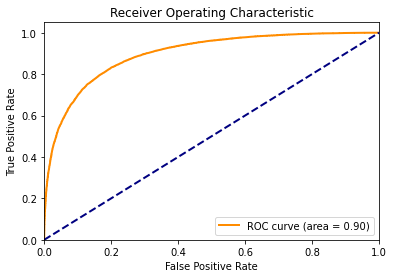

In [39]:
# Calculate ROC curve and AUC
if len(np.unique(test_labels)) == 2:
    fpr, tpr, _ = roc_curve(test_labels, logits[:, 1])
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()
else:
    print("ROC curve is only applicable for binary classification.")

In [45]:
import torch

# Function to predict a single sample from the test dataset
def predict_single_sample_from_test(test_df, model, tokenizer, sample_index):
    model.eval()
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model = model.to(device)
    
    with torch.no_grad():
        # Retrieve the specific sample from test_df
        text = test_df['text'].iloc[sample_index]
        label = test_df['label'].iloc[sample_index]
        
        # Tokenize the text
        inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True)
        input_ids = inputs['input_ids'].to(device)
        attention_mask = inputs['attention_mask'].to(device)
        
        # Make predictions
        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        predicted_label = torch.argmax(logits, dim=1).item()
        
        # Decode the input text
        decoded_text = tokenizer.decode(input_ids.squeeze().cpu(), skip_special_tokens=True)
        
        return decoded_text, predicted_label, label

# Example usage to predict a specific sample index from test_df
sample_index = 7  
decoded_text, predicted_label, actual_label = predict_single_sample_from_test(test_df, distilroberta_model, distilroberta_tokenizer, sample_index)

print(f'Input Text: {decoded_text}')
print(f'Predicted label: {predicted_label}')
print(f'Actual label: {actual_label}')


Input Text: ok let me tell you about my bad experience first went to last night for post wedding party which side note is great idea nit was around midnight and the bar wasn really populated there were three bartenders and only one was actually making rounds to see if anyone needed anything the two other bartenders were chatting on the far side of the bar that no one was sitting at kind of counter productive if you ask me ni stood there for about 5 minutes which for busy bar is fine but when am the only one with my card out then it just seems little ridiculous made eye contact with the one girl twice and gave her smile and she literally turned away finally had to walk to them to get their attention was standing right in front of them smiling and they didn ask if need anything finally said are you working and they gave each other weird look felt like was the crazy one asked for beer got the beer nin between that time the other bartender brought food over and set it down she took fry fro